### Introduction

It is fraud detection problems and found there is unbalanced classifiction dataset. To solve that,
1. we need to test with undersampling, oversampling, mixsampling and non sampling dataset.  
    There are total 6 datasets. 2 undersampling datasets, 2 oversampling datsets, 1 mix sampling and non sampling dataset.
2. Train in many models and stacking it. (There are 20 machine learning models, 1 stacking model, 2 ANN models and 1 CNN model)
3. Try to build Deep learning model.   
   
For testing puprose, NearMiss undersampling Dataset is mainly used. But If you want to try other dataset and models, just uncomment. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

from plotly import tools 
import plotly.tools as tls
import plotly.offline as py
import plotly_express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import missingno as msno
py.init_notebook_mode(connected=True)

import cufflinks as cf 
import collections
from scipy.stats import norm

# Imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import Pool, CatBoostClassifier, cv
import lightgbm as lgb
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import auc,roc_auc_score,roc_curve,classification_report,precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import random


2023-04-18 11:21:17.639363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 11:21:17.699175: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 11:21:17.699819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 11:21:18.581306: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Data Import

In [2]:
import os 
datapath = os.path.join("Dataset/")

In [3]:
import pandas as pd 
creditcard_df = pd.read_csv(datapath + "creditcard.csv")

### Data Visualization

In [4]:
creditcard_df.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

In [5]:
creditcard_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
creditcard_df.shape, creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

((284807, 31), None)

In [7]:
creditcard_df[["Time","Amount","Class"]].describe()

Time         Amount          Class
count  284807.000000  284807.000000  284807.000000
mean    94813.859575      88.349619       0.001727
std     47488.145955     250.120109       0.041527
min         0.000000       0.000000       0.000000
25%     54201.500000       5.600000       0.000000
50%     84692.000000      22.000000       0.000000
75%    139320.500000      77.165000       0.000000
max    172792.000000   25691.160000       1.000000

In [8]:
# checking for duplcate entries
creditcard_df.duplicated().sum()

1081

In [9]:
# remove duplicate entries
creditcard_df.drop_duplicates(keep=False,inplace=True)

In [10]:
timedelta = pd.to_timedelta(creditcard_df['Time'], unit='s')
creditcard_df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
creditcard_df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [11]:
creditcard_df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.014480 -0.509348   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.012463 -1.016226   
284804  3.031260 -0.296827  0.708417  0.432454  ... -0.037501  0.640134   
284805  0.623708 -0.686180  0.679145  0.392087  ... -0.163298  0.123205   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  Time_min  \
284802  1.436807  0.250034  0.943651  0.823731    0.77      0        59   
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0        59   
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0        59   
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0        59   
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0        59   

        Time_hour  
284802         23  
284803         23  
284804         23  
284805         23  
284806         23  

[5 rows x 33 columns]

In [12]:
fig = make_subplots(rows=1,cols=2,subplot_titles=['Distribution of Time', 'Distribution of Amount'])
fig.add_trace(go.Histogram(name='Time',histnorm='probability',x=creditcard_df.Time),1,1)
fig.add_trace(go.Histogram(name='Amount',x=creditcard_df.Amount),1,2)
fig.update_xaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=1)
fig.update_xaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=2)
fig.update_yaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=1)
fig.update_yaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=2)
fig.update_layout(template='seaborn',width=700,height=300,margin=dict(t=50,b=0,l=0,r=0))
fig.show()

In [13]:
class_0 = creditcard_df.loc[creditcard_df['Class'] == 0]["Time"]
class_1 = creditcard_df.loc[creditcard_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

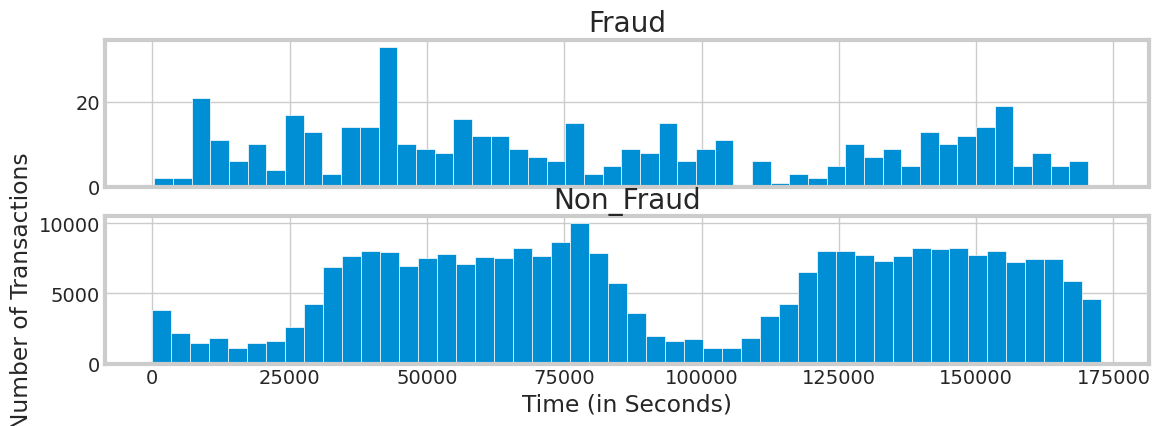

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(creditcard_df.Time[creditcard_df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(creditcard_df.Time[creditcard_df.Class == 0], bins = bins)
ax2.set_title('Non_Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

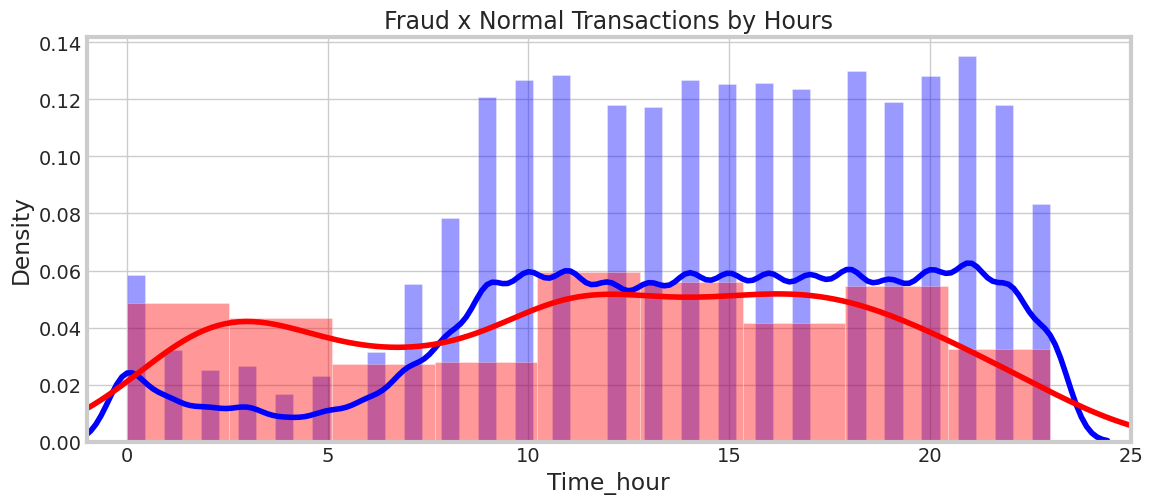

In [15]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(creditcard_df[creditcard_df['Class'] == 0]["Time_hour"], 
             color='b')
sns.distplot(creditcard_df[creditcard_df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

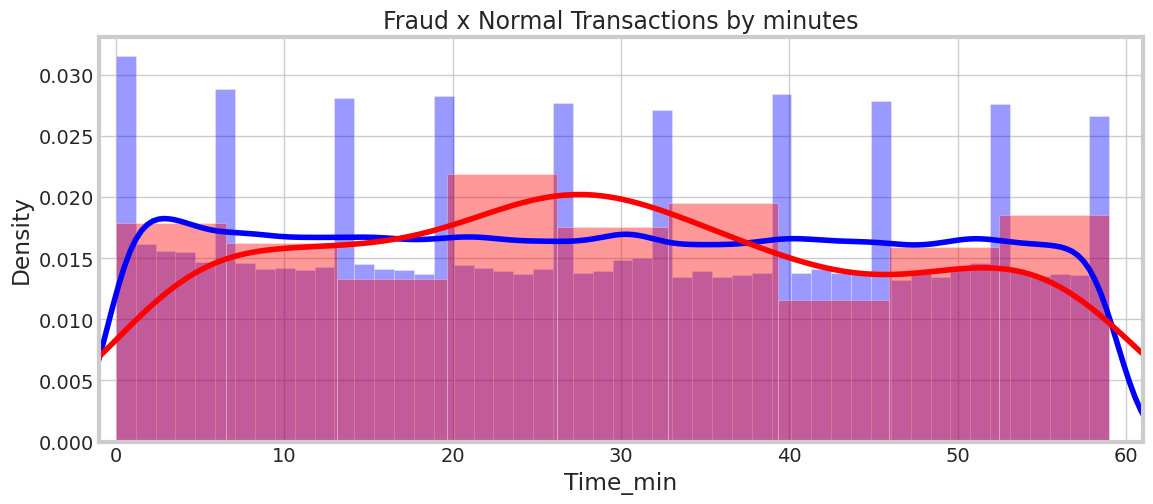

In [16]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(creditcard_df[creditcard_df['Class'] == 0]["Time_min"], 
             color='b')
sns.distplot(creditcard_df[creditcard_df['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

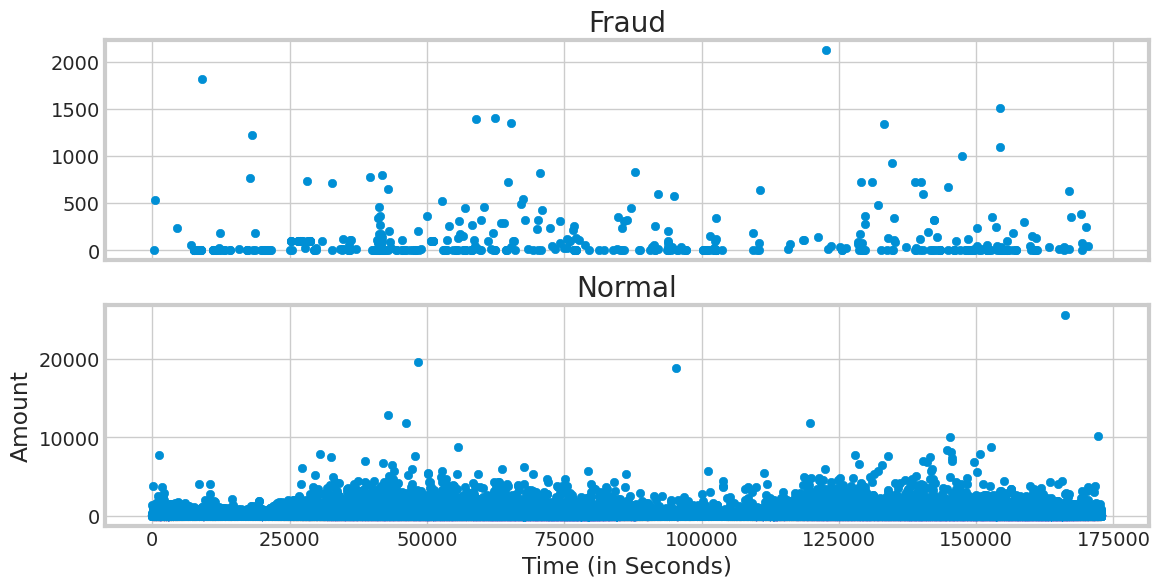

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(creditcard_df.Time[creditcard_df.Class == 1], creditcard_df.Amount[creditcard_df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(creditcard_df.Time[creditcard_df.Class == 0], creditcard_df.Amount[creditcard_df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

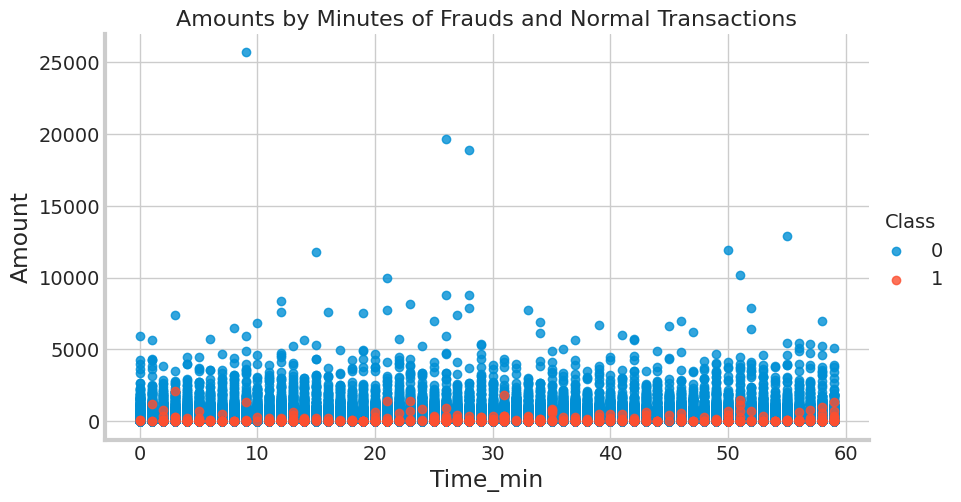

In [18]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=creditcard_df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

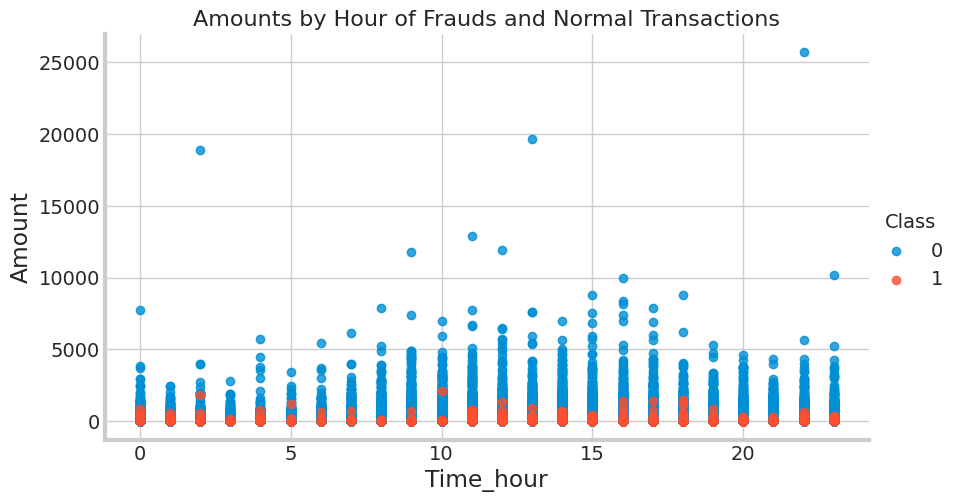

In [19]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=creditcard_df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

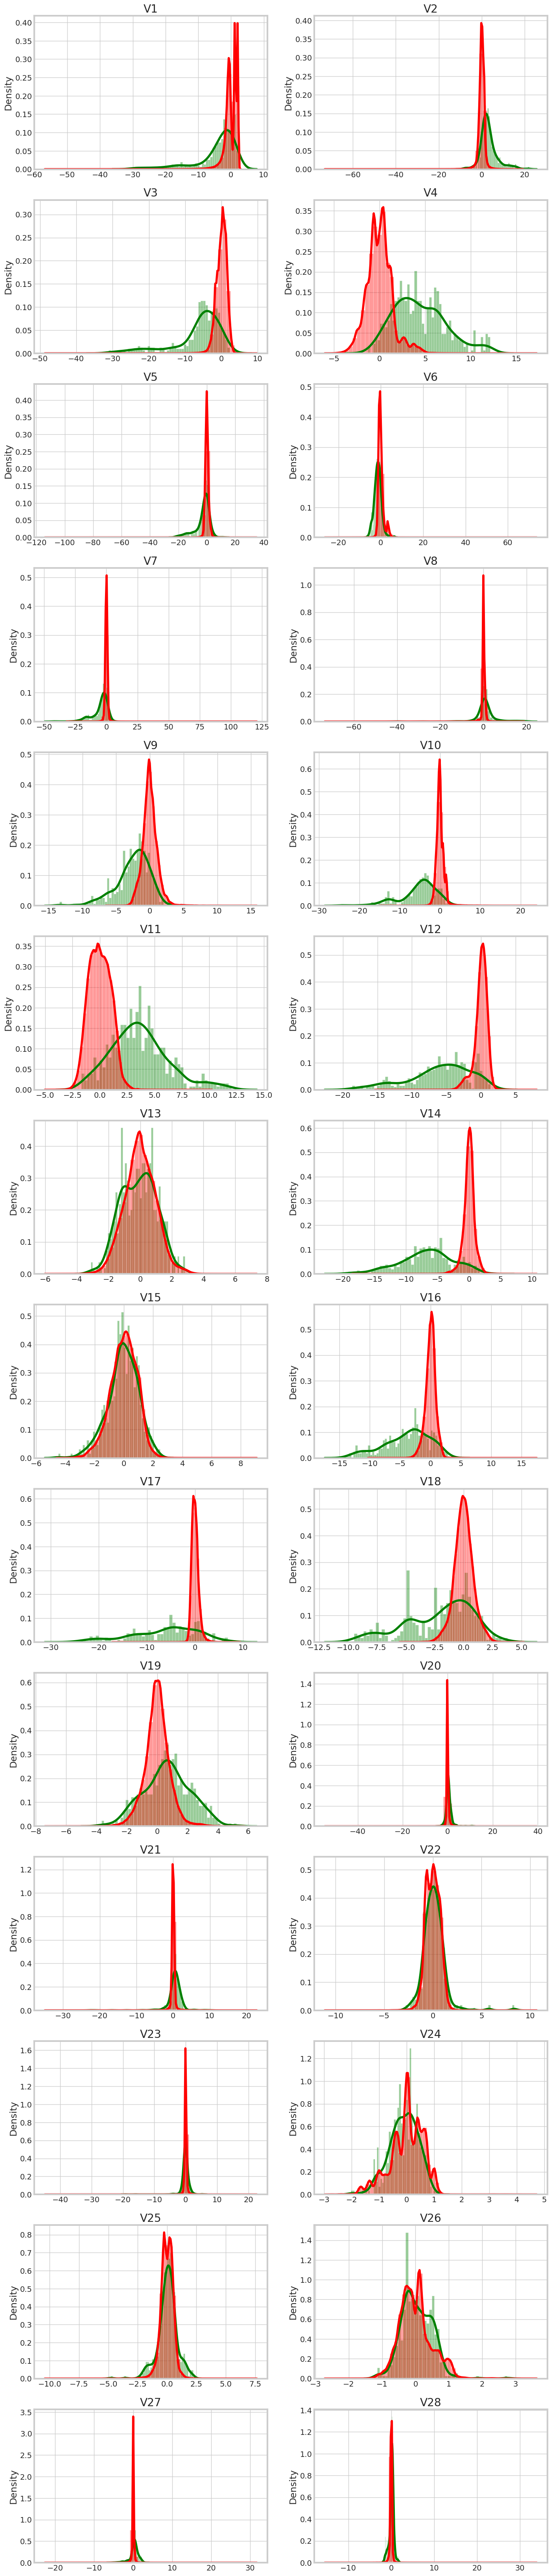

In [20]:
import matplotlib.gridspec as gridspec
#Looking the V's features
columns = creditcard_df.iloc[:,1:29].columns

frauds = creditcard_df.Class == 1
normals = creditcard_df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(creditcard_df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(creditcard_df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(creditcard_df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

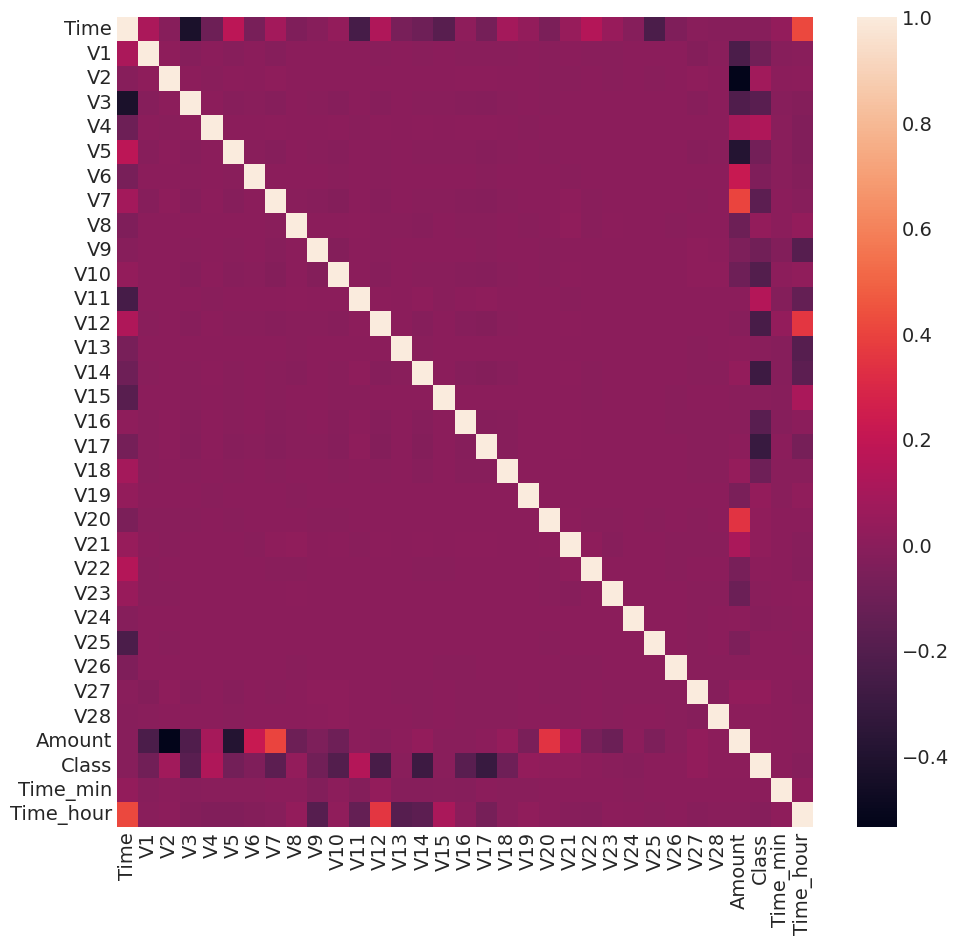

In [21]:
import seaborn as sns

plt.figure(figsize=(10,10))
dataplot=sns.heatmap(creditcard_df.corr())
plt.show()

### Data is highly imbalanced .We will correct it by oversamplying .After correcting we will check the skewness of the data 

* Data prepartion (No sampling, Undersampling, Oversampling, mix)  
* The undersampling take total numnder of minority class. In this case 460.  
* The oversampling take total number of majority class. In this case 282,493 

#### Non sampling dataset

In [22]:
X = creditcard_df.drop(['Class'], axis=1)
y = creditcard_df['Class']
y.value_counts().to_frame()

Class
0  282493
1     460

In [23]:
# X.drop(['Time'], axis=1, inplace=True)
X.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Time_min  Time_hour  
0  0.133558 -0.021053  149.62         0          0  
1 -0.008983  0.014724    2.69         0          0  
2 -0.055353 -0.059752  378.66         0          0  
3  0.062723  0.061458  123.50         0          0  
4  0.219422  0.215153   69.99         0          0  

[5 rows x 32 columns]

In [24]:
X.duplicated().sum()

0

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [26]:
### Note that you can fit_transform the whole oversampled features(train+test) from begining
sc=StandardScaler()
scaled_X=sc.fit_transform(X)
scaled_X

array([[-1.99699158, -0.70581026, -0.0401191 , ...,  0.24378794,
        -1.66387699, -2.40765787],
       [-1.99699158,  0.60881225,  0.1660808 , ..., -0.34260183,
        -1.66387699, -2.40765787],
       [-1.99697052, -0.70506163, -0.81117088, ...,  1.15787433,
        -1.66387699, -2.40765787],
       ...,
       [ 1.64221748,  0.98372881, -0.17911766, ..., -0.08243203,
         1.72175666,  1.53479825],
       [ 1.64221748, -0.1291101 ,  0.3268954 , ..., -0.31342801,
         1.72175666,  1.53479825],
       [ 1.64230173, -0.2800501 , -0.11127064, ...,  0.51269792,
         1.72175666,  1.53479825]])

In [27]:
scaled_X.shape, y.shape

((282953, 32), (282953,))

In [28]:
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996992 -0.705810 -0.040119  1.684260  0.978397 -0.248471  0.348444   
1 -1.996992  0.608812  0.166081  0.108746  0.320386  0.041243 -0.060532   
2 -1.996971 -0.705062 -0.811171  1.176918  0.272009 -0.368387  1.353046   
3 -1.996971 -0.503060 -0.108528  1.190071 -0.607510 -0.009906  0.937653   
4 -1.996949 -0.601959  0.538158  1.027673  0.288462 -0.298563  0.073316   

         V7        V8        V9  ...       V22       V23       V24       V25  \
0  0.193431  0.085852  0.334939  ...  0.383381 -0.177832  0.109901  0.247288   
1 -0.066861  0.074264 -0.231045  ... -0.882128  0.162025 -0.561789  0.321408   
2  0.644577  0.212817 -1.382030  ...  1.065274  1.458984 -1.138797 -0.627966   
3  0.191805  0.323404 -1.265371  ...  0.007027 -0.305978 -1.941795  1.242757   
4  0.482287 -0.228822  0.749869  ...  1.102002 -0.221139  0.232654 -0.394595   

        V26       V27       V28    Amount  Time_min  Time_hour  
0 -0.393113  0.334227 -0.066599  0.243788 -1.663877  -2.407658  
1  0.260602 -0.030201  0.042737 -0.342602 -1.663877  -2.407658  
2 -0.289314 -0.148752 -0.184863  1.157874 -1.663877  -2.407658  
3 -0.461210  0.153126  0.185555  0.139544 -1.663877  -2.407658  
4  1.041713  0.553750  0.655252 -0.074011 -1.663877  -2.407658  

[5 rows x 32 columns]

#### Undersampling

NearMiss

In [29]:
from imblearn.under_sampling import NearMiss
# Create an instance of NearMiss
nm = NearMiss()

# Fit and apply NearMiss to downsample the majority class
nm_features, nm_labels = nm.fit_resample(scaled_X, y)

nm_features.shape, nm_labels.shape, nm_labels.value_counts()


((920, 32),
 (920,),
 0    460
 1    460
 Name: Class, dtype: int64)

RandomUnderSampler

In [30]:
rus = RandomUnderSampler(random_state=42)
rs_features, rs_labels = rus.fit_resample(scaled_X,y)
rs_features.shape, rs_labels.shape, rs_labels.value_counts()


((920, 32),
 (920,),
 0    460
 1    460
 Name: Class, dtype: int64)

#### Oversampling

In [31]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.metrics import classification_report_imbalanced

SMOTE

In [32]:
smote=SMOTE()
sm_features,sm_labels=smote.fit_resample(scaled_X,y)
sm_features.shape,sm_labels.shape, sm_labels.value_counts()

((564986, 32),
 (564986,),
 0    282493
 1    282493
 Name: Class, dtype: int64)

Adasyn

In [33]:
# from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
ad_features, ad_labels = adasyn.fit_resample(scaled_X, y)
ad_features.shape, ad_labels.shape, ad_labels.value_counts()

((564979, 32),
 (564979,),
 0    282493
 1    282486
 Name: Class, dtype: int64)

#### Mix Sampling

In [34]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import random

# Perform random under-sampling on the majority class
rus = NearMiss()
X_under, y_under = rus.fit_resample(scaled_X, y)
print(X_under.shape, y_under.shape)

# Perform random over-sampling on the minority class
ros = SMOTE()
X_over, y_over = ros.fit_resample(scaled_X, y)
print(X_over.shape, y_over.shape)

# Combine the under-sampled majority class and over-sampled minority class
mix_features = np.vstack([X_under, X_over])
mix_labels = np.hstack([y_under, y_over])

mix_features.shape, mix_labels.shape


(920, 32) (920,)
(564986, 32) (564986,)


((565906, 32), (565906,))

In [35]:
mix_features = pd.DataFrame(mix_features, columns=X.columns)

In [36]:
mix_labels = pd.DataFrame(mix_labels)
mix_labels.columns = ['Class']
mix_labels.head()

Class
0      0
1      0
2      0
3      0
4      0

In [37]:
mix_labels.value_counts()

Class
0        282953
1        282953
dtype: int64

Search for duplicated because model can overfit easily

In [38]:
print(f" NearMiss Duplication : {nm_features.duplicated().sum()} \n \
      Rus Duplication : {rs_features.duplicated().sum()} \n \
      SMOTE Duplication : {sm_features.duplicated().sum()} \n \
      ADASYN Duplication : {ad_features.duplicated().sum()} \n \
      Non Duplication : {scaled_X.duplicated().sum()} \n \
      Mix Duplication : {mix_features.duplicated().sum()}")

 NearMiss Duplication : 0 
       Rus Duplication : 0 
       SMOTE Duplication : 0 
       ADASYN Duplication : 0 
       Non Duplication : 0 
       Mix Duplication : 920


In [39]:
Mix_df =pd.concat([mix_features, mix_labels],ignore_index=False,axis=1,sort=False)
Mix_df

Time         V1        V2         V3        V4         V5  \
0      -1.417289 -13.719887  9.035915 -18.448511  4.537272 -13.839960   
1      -1.444817  -9.253436  6.737160 -13.791890  4.301963  -9.740876   
2       0.998467   0.880569  0.629586  -1.368807  2.979548   0.798589   
3       0.988841   0.930573 -0.108953  -1.268811  0.318665   0.243340   
4       0.919822   0.923772 -0.090966  -1.139275  0.415132   0.023123   
...          ...        ...       ...        ...       ...        ...   
565901 -1.581692  -7.313601  4.204955 -13.436594  7.946626  -6.803159   
565902 -0.439732  -1.248361  1.366092  -2.312698  1.367377  -2.131154   
565903  0.467774  -0.516611 -0.561254  -0.821633  0.234059   1.020895   
565904 -0.383040  -0.335222  0.383405   0.726502 -0.097145  -0.382811   
565905 -0.371053  -0.181687  0.875804  -0.546843  1.414049   1.484232   

              V6         V7         V8        V9  ...       V23       V24  \
0      -3.792450 -15.569174  14.978793 -3.375739  ... -1.942658  0.247506   
1      -3.401813 -12.418694  10.314770 -3.678302  ... -1.132060  0.167880   
2      -0.534549   0.547176  -0.118064 -1.374569  ...  0.187759 -0.400959   
3      -0.553318   0.223003  -0.213765  0.771633  ...  0.178621  0.954318   
4      -0.955568   0.304018  -0.337047  0.738044  ...  0.112479 -0.065116   
...          ...        ...        ...       ...  ...       ...       ...   
565901 -1.061013 -13.062456  -0.088515 -5.438415  ...  1.914879 -1.420629   
565902 -0.071901  -1.424515   0.974729 -1.762222  ...  0.252009 -0.937496   
565903 -0.895406   0.109660  -0.707221  0.660189  ...  0.538537  1.129859   
565904 -0.454006   0.546019   0.065035 -0.151240  ... -0.142892  0.648832   
565905 -0.409981   0.394562   0.073991 -0.481188  ... -0.426887 -1.901317   

             V25       V26       V27       V28    Amount  Time_min  Time_hour  \
0       3.606320 -0.467622  3.207436  1.378380 -0.349347  0.516701  -1.207780   
1       2.259838 -0.496076  3.966972  1.672280 -0.349347 -0.745739  -1.207780   
2      -0.206764 -0.431529 -0.087741  0.065579 -0.020493  0.057632   0.163509   
3      -0.109549 -0.272746 -0.059617  0.025236  0.118791 -0.401437   0.163509   
4      -0.116972 -0.223991 -0.051510  0.011484  0.133758 -0.057136  -0.007902   
...          ...       ...       ...       ...       ...       ...        ...   
565901 -1.363899  0.966668  4.600519 -4.825011 -0.071761 -0.057181  -1.550602   
565902 -0.085818 -0.698756  1.361265  0.514980  1.104470  1.054175  -0.107354   
565903 -1.139080 -0.395635  0.716296  0.343314 -0.143790  0.862041  -0.050625   
565904 -0.364669  0.709426 -0.157135  0.030498  0.140018 -0.155080   1.163374   
565905  0.527945 -0.326037  0.284584  0.308556 -0.349347 -0.175086   1.191976   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
565901      1  
565902      1  
565903      1  
565904      1  
565905      1  

[565906 rows x 33 columns]

In [40]:
Mix_df.shape

(565906, 33)

In [41]:
# remove duplicate entries
Mix_df.drop_duplicates(keep=False,inplace=True)
Mix_df.shape , Mix_df.duplicated().sum()

((564066, 33), 0)

In [42]:
mix_features = Mix_df.drop(["Class"],axis=1)
mix_labels = Mix_df['Class']
mix_features.shape, mix_labels.shape, mix_labels.value_counts()

((564066, 32),
 (564066,),
 0    282033
 1    282033
 Name: Class, dtype: int64)

#### Check skewness

In [43]:
def check_skewness(x):
    # this can check relation between each column
    skew_limit=0.75
    skew_value=creditcard_df[x.columns].skew()
    #print(skew_value)
    skew_col=skew_value[abs(skew_value)>skew_limit]
    cols=skew_col.index
    return cols

In [44]:
skewed_col_sm = check_skewness(sm_features)
skewed_col_ad = check_skewness(ad_features)
skewed_col_nm = check_skewness(nm_features)
skewed_col_rs = check_skewness(rs_features)
skewed_col_mix = check_skewness(mix_features)
skewed_col_non = check_skewness(scaled_X)
print(f"SMOTE col : \n {skewed_col_sm} \n  \
      Adasyn col : \n {skewed_col_ad} \n  \
      NearMiss col : \n {skewed_col_nm} \n  \
      Random col : \n {skewed_col_rs} \n  \
      Mix col : \n {skewed_col_mix} \n \
      NOn col : \n {skewed_col_non}") 

SMOTE col : 
 Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object') 
        Adasyn col : 
 Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object') 
        NearMiss col : 
 Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object') 
        Random col : 
 Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object') 
        Mix col : 
 Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object') 
       NOn col : 
 Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23',

In [45]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(standardize=False)
sm_features[skewed_col_sm]=pt.fit_transform(sm_features[skewed_col_sm])
ad_features[skewed_col_ad]=pt.fit_transform(ad_features[skewed_col_ad])
nm_features[skewed_col_nm]=pt.fit_transform(nm_features[skewed_col_nm])
rs_features[skewed_col_rs]=pt.fit_transform(rs_features[skewed_col_rs])
mix_features[skewed_col_mix]=pt.fit_transform(mix_features[skewed_col_mix])
scaled_X[skewed_col_non]=pt.fit_transform(scaled_X[skewed_col_non])

### Train_test_split

In [46]:
# This is just showing how to train_test_split and add the whole muliple dataset to one dictory

from sklearn.model_selection import train_test_split
Meta_Dataset = {}

print("Splitting Normal : ")
train_n_features, \
test_n_features, \
train_n_labels, \
test_n_labels=train_test_split(scaled_X,y,test_size=0.2,random_state=1)
print(train_n_features.shape, train_n_labels.shape, test_n_features.shape, test_n_labels.shape)
Meta_Dataset["None"] = [train_n_features.to_numpy(), train_n_labels.to_numpy(), test_n_features.to_numpy(), test_n_labels.to_numpy()]

print("Splitting SMOTE : ")
train_sm_features, \
test_sm_features, \
train_sm_labels, \
test_sm_labels=train_test_split(sm_features,sm_labels,test_size=0.2,random_state=1)
print(train_sm_features.shape, train_sm_labels.shape, test_sm_features.shape, test_sm_labels.shape)
Meta_Dataset["SMOTE"] = [train_sm_features.to_numpy(), train_sm_labels.to_numpy(), test_sm_features.to_numpy(), test_sm_labels.to_numpy()]

print("Splitting ADASYN : ")
train_ad_features, \
test_ad_features, \
train_ad_labels, \
test_ad_labels=train_test_split(ad_features,ad_labels,test_size=0.2,random_state=1)
print(train_ad_features.shape, train_ad_labels.shape, test_ad_features.shape, test_ad_labels.shape)
Meta_Dataset["ADASYN"] = [train_ad_features.to_numpy(), train_ad_labels.to_numpy(), test_ad_features.to_numpy(), test_ad_labels.to_numpy()]

print("Splitting NEARMISS : ")
train_nm_features, \
test_nm_features, \
train_nm_labels, \
test_nm_labels=train_test_split(nm_features,nm_labels,test_size=0.2,random_state=1)
print(train_nm_features.shape, train_nm_labels.shape, test_nm_features.shape, test_nm_labels.shape)
Meta_Dataset["NEARMISS"] = [train_nm_features.to_numpy(), train_nm_labels.to_numpy(), test_nm_features.to_numpy(), test_nm_labels.to_numpy()]

print("Splitting Random_Sampling : ")
train_rs_features, \
test_rs_features, \
train_rs_labels, \
test_rs_labels=train_test_split(rs_features,rs_labels,test_size=0.2,random_state=1)
print(train_rs_features.shape, train_rs_labels.shape, test_rs_features.shape, test_rs_labels.shape)
Meta_Dataset["Random Sampling"] = [train_rs_features.to_numpy(), train_rs_labels.to_numpy(), test_rs_features.to_numpy(), test_rs_labels.to_numpy()]

print("Splitting MIX : ")
train_mix_features, \
test_mix_features, \
train_mix_labels, \
test_mix_labels=train_test_split(mix_features,mix_labels,test_size=0.2,random_state=1)
print(train_mix_features.shape, train_mix_labels.shape, test_mix_features.shape, test_mix_labels.shape)
Meta_Dataset["Mixing"] = [train_mix_features.to_numpy(), train_mix_labels.to_numpy(), test_mix_features.to_numpy(), test_mix_labels.to_numpy()]


Splitting Normal : 
(226362, 32) (226362,) (56591, 32) (56591,)
Splitting SMOTE : 
(451988, 32) (451988,) (112998, 32) (112998,)
Splitting ADASYN : 
(451983, 32) (451983,) (112996, 32) (112996,)
Splitting NEARMISS : 
(736, 32) (736,) (184, 32) (184,)
Splitting Random_Sampling : 
(736, 32) (736,) (184, 32) (184,)
Splitting MIX : 
(451252, 32) (451252,) (112814, 32) (112814,)


In [47]:
# Check Meta_Dataset
for Name, values in Meta_Dataset.items():
   print(Name) 
   print(values[0].shape, values[1].shape, values[2].shape, values[3].shape)

None
(226362, 32) (226362,) (56591, 32) (56591,)
SMOTE
(451988, 32) (451988,) (112998, 32) (112998,)
ADASYN
(451983, 32) (451983,) (112996, 32) (112996,)
NEARMISS
(736, 32) (736,) (184, 32) (184,)
Random Sampling
(736, 32) (736,) (184, 32) (184,)
Mixing
(451252, 32) (451252,) (112814, 32) (112814,)


If you take all of the Dataset it will be too long to train and test. For testing purpose, NearMiss Undersampling data is used

In [48]:
# Selection NearMiss Datasets
train_nm_features   = train_nm_features.to_numpy()
train_nm_labels     = train_nm_labels.to_numpy() 
test_nm_features    = test_nm_features.to_numpy()
test_nm_labels      = test_nm_labels.to_numpy()
print(train_nm_features.shape, train_nm_labels.shape, test_nm_features.shape, test_nm_labels.shape)

(736, 32) (736,) (184, 32) (184,)


### Model Builing (25 model)

In [58]:
#Building Model Dict
Models = {
    "Logistic Regression": LogisticRegression(),                    #
    "Support Vector Classifier": SVC(),                             # Ridge, SVC, LinearSVC, Passive_AC
    "Decision Tree": DecisionTreeClassifier(max_depth=6),           #
    "KNearest": KNeighborsClassifier(n_neighbors=5),                # doesn't have model.predict_proba so I left out.
    "GaussianNB" : GaussianNB(),                                    #
    "LDA" : LinearDiscriminantAnalysis(),                           # 
    "Ridge" : RidgeClassifier(),                                    #  
    "QDA" : QuadraticDiscriminantAnalysis(),                        #
    "Bagging" : BaggingClassifier(),                                #
    "MLP" : MLPClassifier(),                                        #
    "LSVC" : LinearSVC(),                                           #  
    "BernoulliNB" : BernoulliNB(),                                  #  
    "Passive_AC" : PassiveAggressiveClassifier(),                   # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  
    "SGB"     : GradientBoostingClassifier(n_estimators=100, random_state=9),
    "Adaboost" : AdaBoostClassifier(n_estimators=100, random_state=9, algorithm='SAMME.R', learning_rate=0.8),
    "Extra_T" : ExtraTreesClassifier(n_estimators=100, max_features=3),
    "R_forest" : RandomForestClassifier(max_samples=0.9, n_estimators=100, max_features=3),
    "XGB" : xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)}

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

In [60]:
# This function to calculate all of the evaluation matrix

def calculate_socre(classifier, test_features, test_labels):

    predictions   = classifier.predict(test_features)
    base_score   = classifier.score(test_sm_features,test_sm_labels)
    accuracy     = accuracy_score(test_labels, predictions)
    acc_bal      = balanced_accuracy_score(test_labels, predictions)
    av_precision = average_precision_score(test_labels, predictions)
    recall       = recall_score(test_labels, predictions)#Set df_used to the fraudulent transactions' dataset.
    f1           = f1_score(test_labels, predictions)
    roc          = roc_auc_score(test_labels, classifier.predict_proba(test_features)[:, 1])
    mcc          = matthews_corrcoef(test_labels, predictions)
    score = {
        "base_score"     : round(base_score,3),
        "accuary"        : round(accuracy,3),
        "acc_bal"        : round(acc_bal,3),
        "av_precision"   : round(av_precision,3),
        "recall"         : round(recall,3),
        "f1"             : round(f1,3),
        "roc"            : round(roc,3),
        "mcc"            : round(mcc,3)   }
    return score

In [61]:
# This function train all the Dataset and all models
def Train_all_Model():

    Dataset_scores = {}

    for Name, values in Meta_Dataset.items():
        print(f"The {Name} Dataset is using.........")
        i = 1
        Model_scores = {} #Model = Socre
        for Model_Name, classifier in Models.items():
            print(f"{i}. {Model_Name}")
            classifier.fit(values[0], values[1])
            score = calculate_socre(classifier=classifier,
                                    test_features=values[2],
                                    test_labels=values[3])
            i = i+1
            print(f"{score}")
            Model_scores[Model_Name] = score
        print("________________________________________")
        Dataset_scores[Name] = Model_scores
    return Dataset_scores

This may take nearly 2 Hr to run all the models.

In [62]:
#Dataset_scores = Train_all_Model()

For testing purpose, NearMiss undersampling dataset is used, and calculate_score function is modifed by removeing roc

In [63]:
def calculate_nm_score(classifier, test_features=test_nm_features, test_labels=test_nm_labels):

    predictions   = classifier.predict(test_features)
    base_score   = classifier.score(test_sm_features,test_sm_labels)
    accuracy     = accuracy_score(test_labels, predictions)
    acc_bal      = balanced_accuracy_score(test_labels, predictions)
    av_precision = average_precision_score(test_labels, predictions)
    recall       = recall_score(test_labels, predictions)#Set df_used to the fraudulent transactions' dataset.
    f1           = f1_score(test_labels, predictions)
    mcc          = matthews_corrcoef(test_labels, predictions)
    score = {
        "base_score"     : round(base_score,3),
        "accuary"        : round(accuracy,3),
        "acc_bal"        : round(acc_bal,3),
        "av_precision"   : round(av_precision,3),
        "recall"         : round(recall,3),
        "f1"             : round(f1,3),
        "mcc"            : round(mcc,3)   }
    return score

In [64]:
# for short in time,and resources, NearMiss undersampling data is taken
def train_nm_dataset():
    i = 1
    Model_scores = {} #Model = Socre
    for Model_Name, classifier in Models.items():
        print(f"{i}. {Model_Name}")
        classifier.fit(train_nm_features, train_nm_labels)
        score = calculate_nm_score(classifier=classifier)
        i = i+1
        print(f"{score}")
        print("________________________________________")
        Model_scores[Model_Name] = score
    return Model_scores

This may take short because of NearMiss undersampling dataset, but data result are not good

In [65]:
nm_Model_score = train_nm_dataset()

1. Logistic Regression
{'base_score': 0.798, 'accuary': 0.94, 'acc_bal': 0.943, 'av_precision': 0.938, 'recall': 0.909, 'f1': 0.942, 'mcc': 0.883}
________________________________________
2. Support Vector Classifier
{'base_score': 0.749, 'accuary': 0.962, 'acc_bal': 0.965, 'av_precision': 0.967, 'recall': 0.929, 'f1': 0.963, 'mcc': 0.927}
________________________________________
3. Decision Tree
{'base_score': 0.644, 'accuary': 0.94, 'acc_bal': 0.942, 'av_precision': 0.933, 'recall': 0.919, 'f1': 0.943, 'mcc': 0.882}
________________________________________
4. KNearest
{'base_score': 0.894, 'accuary': 0.924, 'acc_bal': 0.929, 'av_precision': 0.935, 'recall': 0.859, 'f1': 0.924, 'mcc': 0.859}
________________________________________
5. GaussianNB
{'base_score': 0.747, 'accuary': 0.967, 'acc_bal': 0.97, 'av_precision': 0.972, 'recall': 0.939, 'f1': 0.969, 'mcc': 0.937}
________________________________________
6. LDA
{'base_score': 0.807, 'accuary': 0.935, 'acc_bal': 0.939, 'av_precision

In [66]:
# lgb

params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }


lgb_train = lgb.Dataset(train_nm_features, train_nm_labels,  params={'verbose': -1})
lgb_test = lgb.Dataset(train_nm_features, train_nm_labels,  params={'verbose': -1}, reference=lgb_train)

LGBM = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_test], verbose_eval=False)
LGBM_pred=LGBM.predict(test_nm_features)
LGBM_pred = LGBM_pred.round()


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [67]:
LGBM_f1_score = f1_score(y_true=test_nm_labels,
                      y_pred=LGBM_pred)
LGBM_f1_score

0.88

In [68]:
Catboost=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,)
Catboost.fit(train_nm_features,train_nm_labels,eval_set=(test_nm_features,test_nm_labels))

Learning rate set to 0.029378
0:	learn: 0.9415761	test: 0.9510870	best: 0.9510870 (0)	total: 59.4ms	remaining: 59.3s
1:	learn: 0.9442935	test: 0.9402174	best: 0.9510870 (0)	total: 64.2ms	remaining: 32s
2:	learn: 0.9429348	test: 0.9510870	best: 0.9510870 (0)	total: 71.3ms	remaining: 23.7s
3:	learn: 0.9510870	test: 0.9456522	best: 0.9510870 (0)	total: 78ms	remaining: 19.4s
4:	learn: 0.9538043	test: 0.9456522	best: 0.9510870 (0)	total: 86.5ms	remaining: 17.2s
5:	learn: 0.9565217	test: 0.9456522	best: 0.9510870 (0)	total: 93.7ms	remaining: 15.5s
6:	learn: 0.9592391	test: 0.9347826	best: 0.9510870 (0)	total: 101ms	remaining: 14.4s
7:	learn: 0.9592391	test: 0.9402174	best: 0.9510870 (0)	total: 110ms	remaining: 13.6s
8:	learn: 0.9578804	test: 0.9402174	best: 0.9510870 (0)	total: 118ms	remaining: 12.9s
9:	learn: 0.9605978	test: 0.9456522	best: 0.9510870 (0)	total: 125ms	remaining: 12.3s
10:	learn: 0.9619565	test: 0.9456522	best: 0.9510870 (0)	total: 134ms	remaining: 12s
11:	learn: 0.9619565	te

In [69]:
cat_pred = Catboost.predict(test_nm_features)
cat_F1_score = f1_score(y_true = test_nm_labels,
                  y_pred = cat_pred)
cat_F1_score

0.96875

### Stacking + SMOTE 
Because of Training Time, Datasets and Models are selected just to test the stacking
* Base Models = Random Forest, K Nearest Neighbors
* Stack Models = Logistic Regression
* Dataset = Oversampling Dataset with SMOTE

In [70]:
from sklearn.ensemble import StackingClassifier

base_models=[('RF',RandomForestClassifier(max_samples=0.9,n_jobs=-1)),('knn',KNeighborsClassifier(n_neighbors=5,n_jobs=-1))]
meta_model = LogisticRegression(n_jobs=-1)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, cv=3,n_jobs=-1)

This take 20 min to run on my laptop

In [71]:
# stacking_model.fit(train_sm_features,train_sm_labels)
# acc=stacking_model.score(test_sm_features,test_sm_labels)

On oversampling(SMOTE) dataset, the stack model get 0(False Negative) which is very good. But on undersampling data. It seem little overfit.

In [72]:
stacking_model.fit(train_nm_features,train_nm_labels)
acc=stacking_model.score(test_nm_features,test_nm_labels)

<AxesSubplot: >

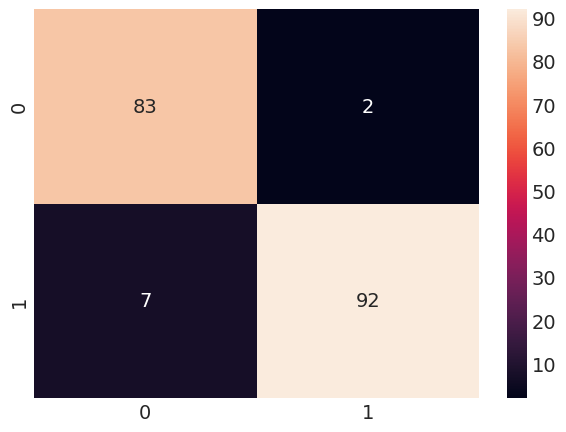

In [73]:
from sklearn.metrics import confusion_matrix
y_pred = stacking_model.predict(test_nm_features)
conf_matrix = confusion_matrix(test_nm_labels, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [74]:
from sklearn.metrics import classification_report
print(classification_report(test_nm_labels, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        85
           1       0.98      0.93      0.95        99

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



In [75]:
stack_f1_score = f1_score(y_true=test_nm_labels,
                          y_pred=y_pred)
stack_f1_score

0.9533678756476683

### Tensorflow

#### Base Model

In [76]:
n_inputs = sm_features.shape[1]
x_inputs = nm_features.shape[1]
print(n_inputs, x_inputs)

tf.set_seed = 42

base_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

base_model.summary()

base_model.compile(
    optimizer = Adam(learning_rate= 0.0001),
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

32 32
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


In [77]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
undersample_model = base_model
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


In [79]:
tf.set_seed = 42
undersample_history = undersample_model.fit(train_nm_features,
                        train_nm_labels,
                        batch_size= 25,
                        epochs=20,
                        validation_data=(test_nm_features,test_nm_labels))

Epoch 1/20
30/30 [==============================] - 2s 15ms/step - loss: 0.7851 - accuracy: 0.4823 - val_loss: 0.7817 - val_accuracy: 0.4511
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5652 - val_loss: 0.6966 - val_accuracy: 0.5435
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6481 - val_loss: 0.6314 - val_accuracy: 0.6522
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5929 - accuracy: 0.7486 - val_loss: 0.5774 - val_accuracy: 0.7935
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.8193 - val_loss: 0.5366 - val_accuracy: 0.8587
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.8655 - val_loss: 0.5012 - val_accuracy: 0.8913
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.8818 - val_loss: 0.4719 - val_accuracy: 0.9185
Epoch 8/20
30/30 [=

In [80]:
undersample_predictions = undersample_model.predict(test_nm_features, batch_size=200, verbose=0)
undersample_predictions.shape

(184, 1)

By comparing f1_score :  undersampling_ANN to stack, 

In [81]:
undersample_fraud_predictions=np.round(undersample_predictions)
undersample_f1 = f1_score(y_true=test_nm_labels,
                          y_pred=undersample_fraud_predictions)
undersample_f1

0.9189189189189189

Confusion matrix, without normalization
[[84  1]
 [14 85]]
Confusion matrix, without normalization
[[85  0]
 [ 0 99]]


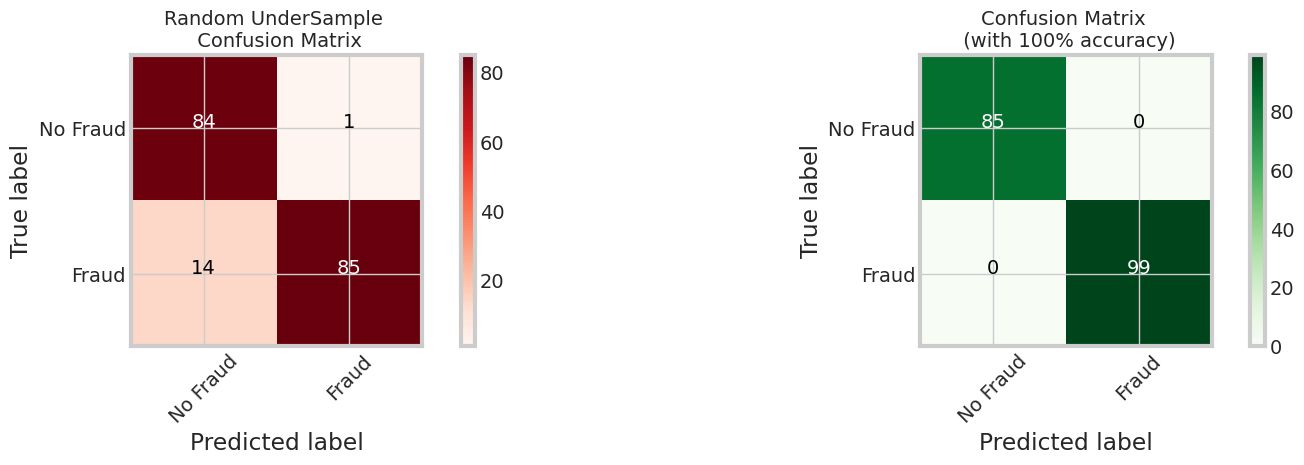

In [82]:
from sklearn.metrics import confusion_matrix
undersample_cm = confusion_matrix(test_nm_labels, undersample_fraud_predictions)
actual_cm = confusion_matrix(test_nm_labels, test_nm_labels)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [83]:
oversample_model = base_model
oversample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


This model takes 30 min on my laptop

In [84]:
# oversample_history = oversample_model.fit(train_sm_features,
#                         train_sm_labels,
#                         batch_size= 25,
#                         epochs=20,
#                         validation_data=(test_sm_features,test_sm_labels))

In [85]:
# oversample_predictions = oversample_model.predict(test_sm_features, batch_size=200, verbose=0)
# oversample_predictions.shape

In [86]:
# oversample_fraud_predictions=np.round(oversample_predictions)
# f1_oversample = f1_score(y_true=test_sm_labels,
#                          y_pred=oversample_fraud_predictions)
# f1_oversample

In [87]:
# oversample_smote = confusion_matrix(test_sm_labels, oversample_fraud_predictions)
# actual_cm = confusion_matrix(test_sm_labels, test_sm_labels)
# labels = ['No Fraud', 'Fraud']

# fig = plt.figure(figsize=(16,8))

# fig.add_subplot(221)
# plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

# fig.add_subplot(222)
# plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

From this far, we have seem stacking models and oversampling(SMOTE) DNN model are so great.

#### CNN model

In [88]:
train_sm_features = np.array(train_sm_features)
test_sm_features = np.array(test_sm_features)

In [89]:
# Reshaping the input to 3D.
train_sm_features_cnn = train_sm_features.reshape(train_sm_features.shape[0],train_sm_features.shape[1],1)
test_sm_features_cnn = test_sm_features.reshape(test_sm_features.shape[0],test_sm_features.shape[1],1)

In [90]:
import tensorflow as tf
from tensorflow.keras import layers


# Build the model
cnn_model = keras.Sequential([
        # keras.Input(shape=input_shape),
        layers.Conv1D(32, 2, activation="relu",input_shape=train_sm_features_cnn[0].shape),
        layers.Dropout(0.5),
        layers.Conv1D(64, 2, activation="relu"),
        layers.Dropout(0.5),
        layers.Conv1D(64, 2, activation="relu"),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ])
cnn_model.summary()

cnn_model.compile(
    optimizer = Adam(learning_rate= 0.0001),
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 32)            96        
                                                                 
 dropout (Dropout)           (None, 31, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 29, 64)            8256      
                                                                 
 dropout_2 (Dropout)         (None, 29, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1856)             

Running this model almosts take 1Hr on my laptop, if you like to run, just run on gpu

In [91]:
# cnn_history = cnn_model.fit(train_sm_features_cnn,
#                         train_sm_labels,
#                         batch_size= 25,
#                         epochs=20,
#                         validation_data=(test_sm_features_cnn,test_sm_labels))

In [92]:
def plotLearningCurve(history,epochs=20):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

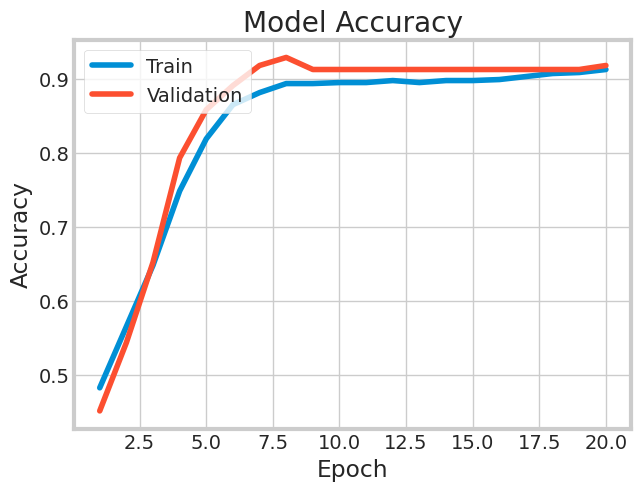

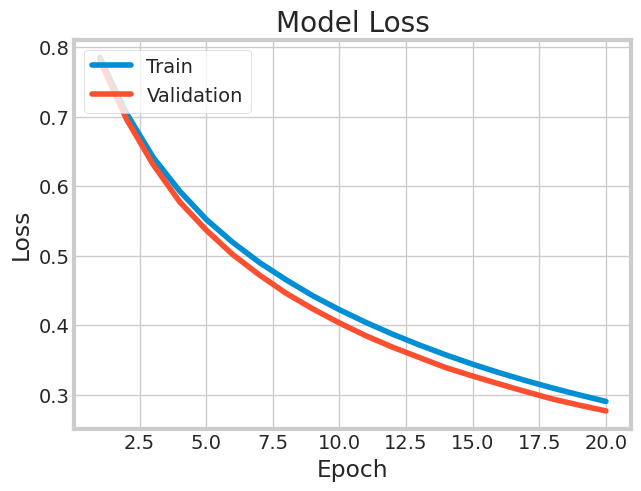

In [93]:
plotLearningCurve(undersample_history)

In [94]:
# plotLearningCurve(oversample_history)

In [95]:
# plotLearningCurve(cnn_history)

### Hyper-parameter Tuing

GridSearchCV and RandomizeSearchCV  

In general, GridSearchCV is best suited for smaller hyperparameter spaces, where it is feasible to test all possible combinations. RandomizedSearchCV is best suited for larger hyperparameter spaces, where it is not feasible to test all possible combinations, and random sampling can efficiently search a wide range of hyperparameters.

It's important to note that both GridSearchCV and RandomizedSearchCV can be combined with other techniques, such as cross-validation and feature selection, to further improve the performance of machine learning models. The choice of hyperparameter tuning technique ultimately depends on the size and complexity of the hyperparameter space, as well as the available computational resources.

#### Test for hyperparameter tuning

In [96]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier()
}

cross_validation also take alot of time (more than 30 min ) therefore I change from SMOTE dataset to NEARMISS dataset

In [97]:
#Calculate the cross-validation score for each classifier
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(train_nm_features, train_nm_labels)
    cv_score = cross_val_score(classifier, train_nm_features, train_nm_labels, cv=3)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))

Cross-Validation Scores:-
Logistic Regression: 91.98
Support Vector Classifier: 94.84
Decision Tree: 93.21
KNearest: 92.66


In [98]:
params = {
    "Logistic Regression": {"penalty": [ 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
    "KNearest": {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
}

GridsearchCV

In [99]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params)
    grid_classifier.fit(train_nm_features, train_nm_labels)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [100]:
#Scores after applying Grid Search
print('Cross-Validation Scores after applying GridSearch:-')
for key, classifier in classifiers.items():
    best_classifier = gridsearch(classifier,params[key])
    cv_score = cross_val_score(best_classifier, train_nm_features, train_nm_labels, cv=3)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))

Cross-Validation Scores after applying GridSearch:-
Logistic Regression: 92.39
Support Vector Classifier: 94.57
Decision Tree: 92.93
KNearest: 93.07


RandomizedSearchCV

In [101]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Create an instance of RandomizedSearchCV
# random_search = RandomizedSearchCV(models,  n_iter=20, cv=5)

# # Fit RandomizedSearchCV to the dataset
# random_search.fit(data, target)

# # Print the best hyperparameters and the corresponding mean cross-validation score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)


## <a id='learn' > Learning Curve</a>
A learning curve refers to a plot of the prediction accuracy/error vs. the training set size (i.e: how better does the model get at predicting the target as you the increase number of instances used to train it). Usually both the training and test/validation performance are plotted together so we can diagnose the **bias-variance tradeoff** (i.e determine if we benefit from adding more training data, and assess the model complexity by controlling regularization or number of features).
<img src='https://histalk2.com/wp-content/uploads/2018/12/image-30.png' height=400 width=200/>

Just use logistic regression and NearMiss Datasets

In [102]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1)) = plt.subplots(1, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

In [103]:
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
# plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [104]:
log_reg = LogisticRegression()
log_reg.fit(train_nm_features,train_nm_labels)

LogisticRegression()

<module 'matplotlib.pyplot' from '/home/acraf/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

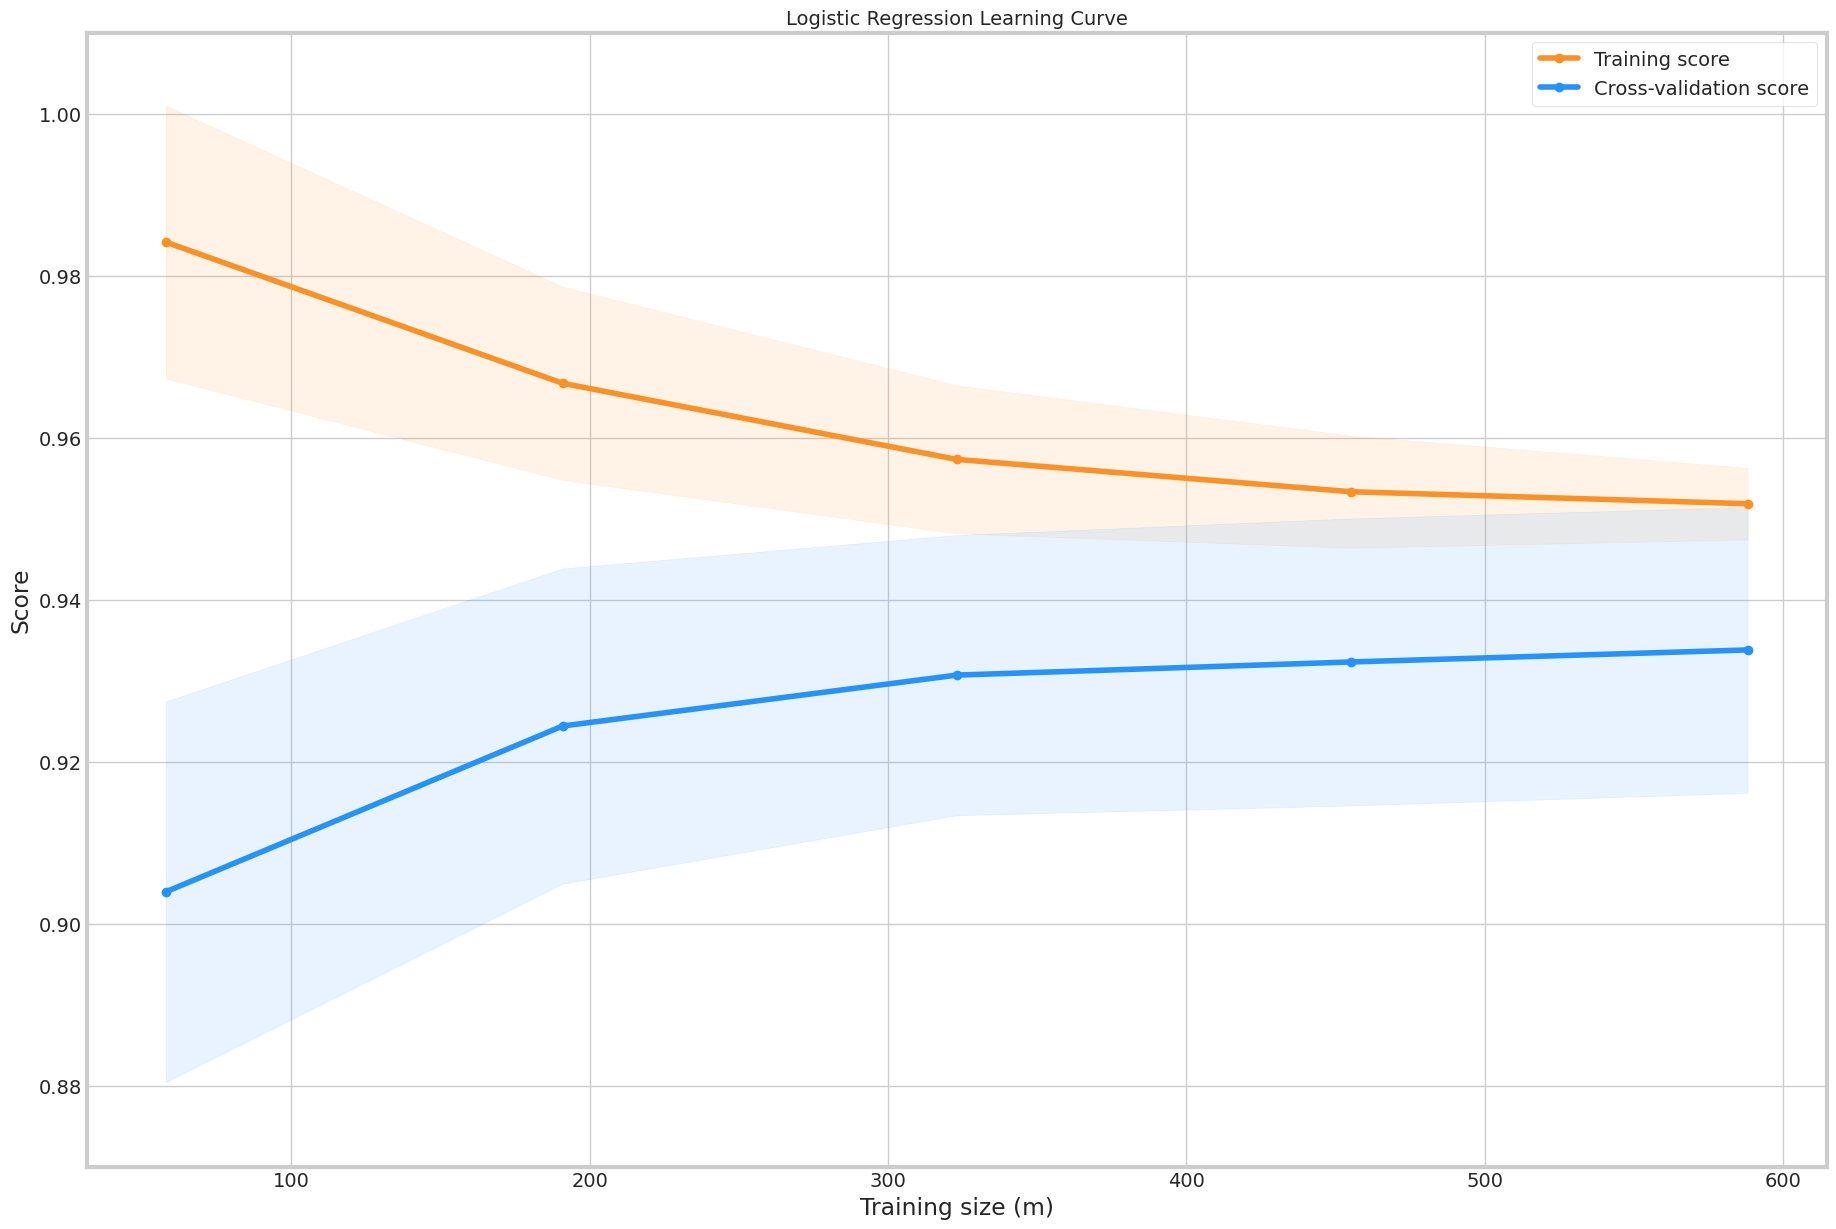

In [105]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, train_nm_features, train_nm_labels, (0.87, 1.01), cv=cv, n_jobs=4)

## <a id='roc'>AUC-ROC Curve</a>
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
<img src='https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png'/>

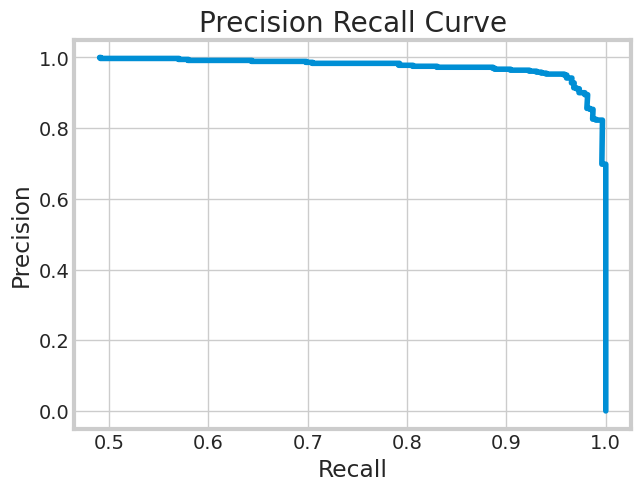

In [106]:
#Predicting proba
y_pred_prob = log_reg.predict_proba(train_nm_features)[:, 1]
# roc_auc_score(test_nm_labels, log_reg.predict_proba(test_nm_features)[:, 1])

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(train_nm_labels, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

<!-- #ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test)
svc_pred = svc.predict(X_test)
tree_pred = decision_tree.predict(X_test)
knear_pred = knearest.predict(X_test)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knear_pred)

fig = go.Figure()
fig.add_trace(go.Scatter(name='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)),
                         x=log_fpr,y=log_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)),
                         x=svc_fpr,y=svc_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)),
                         x=tree_fpr,y=tree_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='K-Nearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knear_pred)),
                         x=knear_fpr,y=knear_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='AUC-ROC=0.5',x=[0,1],y=[0,1],line=dict(dash='dot'),showlegend=False))
fig.update_layout(
    width=700,xaxis=dict(mirror=True,linewidth=2,linecolor='black'),
    yaxis=dict(mirror=True,linewidth=2,linecolor='black'),
    title='ROC Curve<br>(All Classifiers)',
    template='seaborn',
    legend=dict(
        x=0.46,
        y=0,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="Lightgray",
        bordercolor="Black",
        borderwidth=2
    ),
     annotations=[
        dict(
            x=0.5,
            y=0.5,
            xref="x",
            yref="y",
            text="Minimum ROC Score of 50% <br> (This is the minimum score to get)",
            showarrow=True,
            arrowhead=7,
            ax=40,
            ay=50
        )
    ]
)
fig.show() -->

### Final Socre on NearMiss Undersampling

In [107]:
nm_score_df = pd.DataFrame(nm_Model_score)
nm_score_df = nm_score_df.transpose()
nm_score_df

base_score  accuary  acc_bal  av_precision  recall  \
Logistic Regression             0.798    0.940    0.943         0.938   0.909   
Support Vector Classifier       0.749    0.962    0.965         0.967   0.929   
Decision Tree                   0.644    0.940    0.942         0.933   0.919   
KNearest                        0.894    0.924    0.929         0.935   0.859   
GaussianNB                      0.747    0.967    0.970         0.972   0.939   
LDA                             0.807    0.935    0.939         0.944   0.879   
Ridge                           0.808    0.935    0.939         0.944   0.879   
QDA                             0.502    0.984    0.983         0.976   0.990   
Bagging                         0.624    0.967    0.969         0.967   0.949   
MLP                             0.683    0.957    0.959         0.957   0.929   
LSVC                            0.775    0.946    0.948         0.943   0.919   
BernoulliNB                     0.588    0.940    0.944         0.943   0.899   
Passive_AC                      0.753    0.783    0.775         0.730   0.879   
SGB                             0.598    0.951    0.953         0.948   0.929   
Adaboost                        0.646    0.957    0.958         0.952   0.939   
Extra_T                         0.590    0.978    0.980         0.981   0.960   
R_forest                        0.554    0.984    0.985         0.986   0.970   
XGB                             0.606    0.967    0.968         0.962   0.960   

                              f1    mcc  
Logistic Regression        0.942  0.883  
Support Vector Classifier  0.963  0.927  
Decision Tree              0.943  0.882  
KNearest                   0.924  0.859  
GaussianNB                 0.969  0.937  
LDA                        0.935  0.878  
Ridge                      0.935  0.878  
QDA                        0.985  0.967  
Bagging                    0.969  0.936  
MLP                        0.958  0.915  
LSVC                       0.948  0.893  
BernoulliNB                0.942  0.885  
Passive_AC                 0.813  0.566  
SGB                        0.953  0.903  
Adaboost                   0.959  0.914  
Extra_T                    0.979  0.957  
R_forest                   0.985  0.968  
XGB                        0.969  0.935

In [108]:
nm_f1_score_df = nm_score_df.f1
nm_f1_score_df

Logistic Regression          0.942
Support Vector Classifier    0.963
Decision Tree                0.943
KNearest                     0.924
GaussianNB                   0.969
LDA                          0.935
Ridge                        0.935
QDA                          0.985
Bagging                      0.969
MLP                          0.958
LSVC                         0.948
BernoulliNB                  0.942
Passive_AC                   0.813
SGB                          0.953
Adaboost                     0.959
Extra_T                      0.979
R_forest                     0.985
XGB                          0.969
Name: f1, dtype: float64

In [109]:
new_df = {"LGBM_f1_score" : LGBM_f1_score, 
          "cat_F1_score" : cat_F1_score,
          "stack_f1_score" : stack_f1_score,
          "undersample_f1" : undersample_f1
}
new_df = pd.Series(new_df)
new_df

LGBM_f1_score     0.880000
cat_F1_score      0.968750
stack_f1_score    0.953368
undersample_f1    0.918919
dtype: float64

In [110]:
nm_f1_score_df = nm_f1_score_df.append(new_df)

In [111]:
nm_f1_score_df.columns = ["Models", "f1_score"]
nm_f1_score_df = pd.DataFrame(nm_f1_score_df, columns=[ "f1_score"])
nm_f1_score_df

f1_score
Logistic Regression        0.942000
Support Vector Classifier  0.963000
Decision Tree              0.943000
KNearest                   0.924000
GaussianNB                 0.969000
LDA                        0.935000
Ridge                      0.935000
QDA                        0.985000
Bagging                    0.969000
MLP                        0.958000
LSVC                       0.948000
BernoulliNB                0.942000
Passive_AC                 0.813000
SGB                        0.953000
Adaboost                   0.959000
Extra_T                    0.979000
R_forest                   0.985000
XGB                        0.969000
LGBM_f1_score              0.880000
cat_F1_score               0.968750
stack_f1_score             0.953368
undersample_f1             0.918919

In [112]:
# sns.lineplot(x="Models",y="f1_socre", data=nm_f1_score_df)

### Good result output on oversampling with SMOTE dataset
They are just copy from above cells. 

In [113]:
sm_stack = stacking_model

In [114]:
sm_stack.fit(train_sm_features,train_sm_labels)
acc=sm_stack.score(test_sm_features,test_sm_labels)

/home/acraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

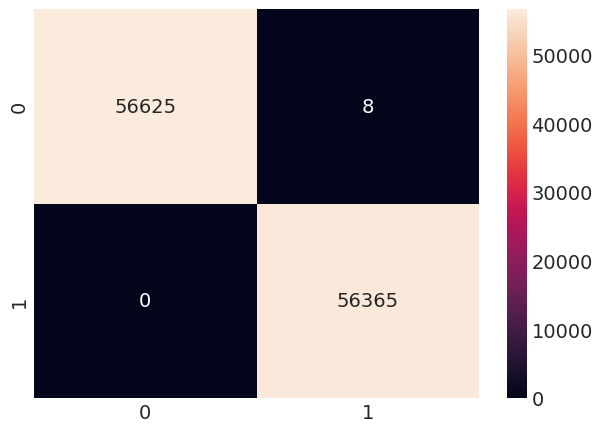

In [115]:
from sklearn.metrics import confusion_matrix
y_pred_sm = sm_stack.predict(test_sm_features)
conf_matrix = confusion_matrix(test_sm_labels, y_pred_sm)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(test_sm_labels, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       1.00      1.00      1.00     56365

    accuracy                           1.00    112998
   macro avg       1.00      1.00      1.00    112998
weighted avg       1.00      1.00      1.00    112998



In [117]:
stack_f1_score = f1_score(y_true=test_sm_labels,
                          y_pred=y_pred_sm)
stack_f1_score

0.9999290390108038

In [118]:
tf.set_seed = 125
oversample_history = oversample_model.fit(train_sm_features,
                        train_sm_labels,
                        batch_size = 25,
                        epochs = 20, # 20
                        validation_data = (test_sm_features,test_sm_labels))

Epoch 1/20
18080/18080 [==============================] - 52s 3ms/step - loss: 0.0800 - accuracy: 0.9704 - val_loss: 0.0352 - val_accuracy: 0.9892
Epoch 2/20
18080/18080 [==============================] - 50s 3ms/step - loss: 0.0227 - accuracy: 0.9944 - val_loss: 0.0150 - val_accuracy: 0.9965
Epoch 3/20
18080/18080 [==============================] - 51s 3ms/step - loss: 0.0118 - accuracy: 0.9976 - val_loss: 0.0095 - val_accuracy: 0.9982
Epoch 4/20
18080/18080 [==============================] - 52s 3ms/step - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.0071 - val_accuracy: 0.9987
Epoch 5/20
18080/18080 [==============================] - 48s 3ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0061 - val_accuracy: 0.9989
Epoch 6/20
18080/18080 [==============================] - 51s 3ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9991
Epoch 7/20
18080/18080 [==============================] - 51s 3ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0

In [119]:
oversample_predictions = oversample_model.predict(test_sm_features, batch_size=200, verbose=0)
oversample_predictions.shape

(112998, 1)

In [120]:
oversample_fraud_predictions=np.round(oversample_predictions)
f1_oversample = f1_score(y_true=test_sm_labels,
                         y_pred=oversample_fraud_predictions)
f1_oversample

0.9995477961713409

Confusion matrix, without normalization
[[56582    51]
 [    0 56365]]
Confusion matrix, without normalization
[[56633     0]
 [    0 56365]]


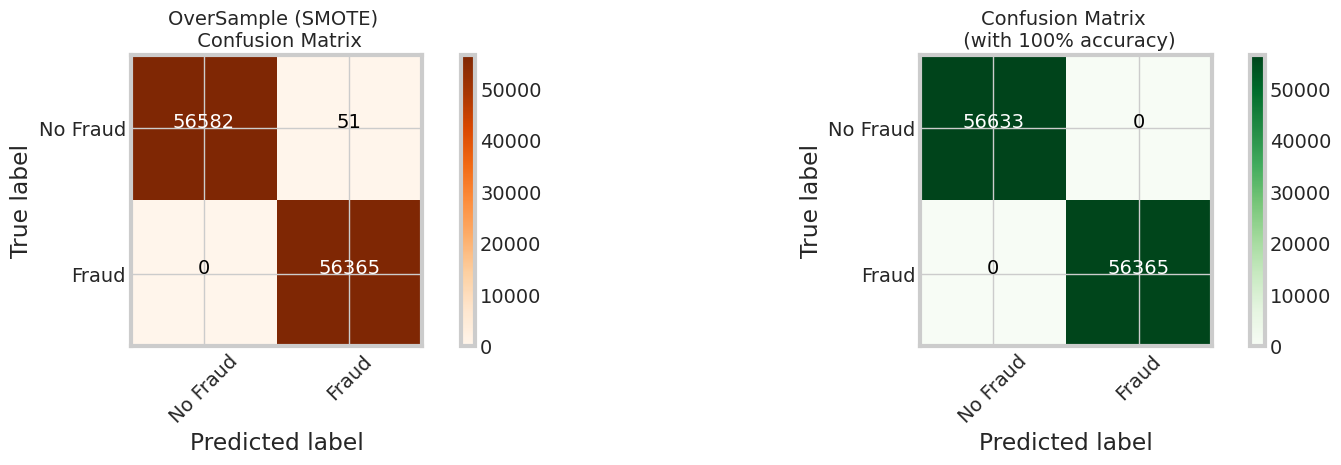

In [121]:
oversample_smote = confusion_matrix(test_sm_labels, oversample_fraud_predictions)
actual_cm = confusion_matrix(test_sm_labels, test_sm_labels)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

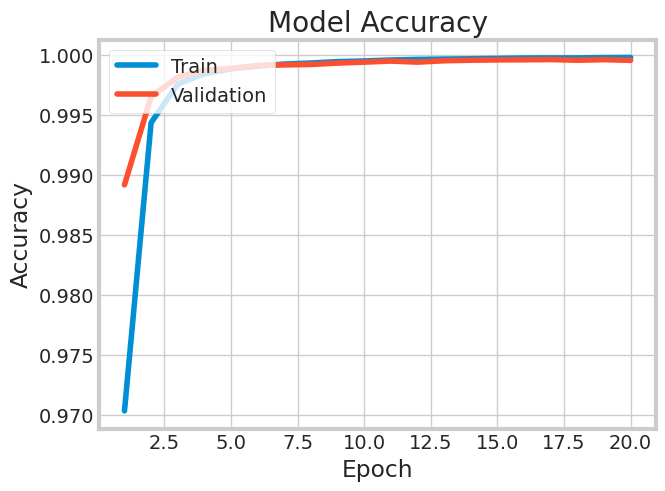

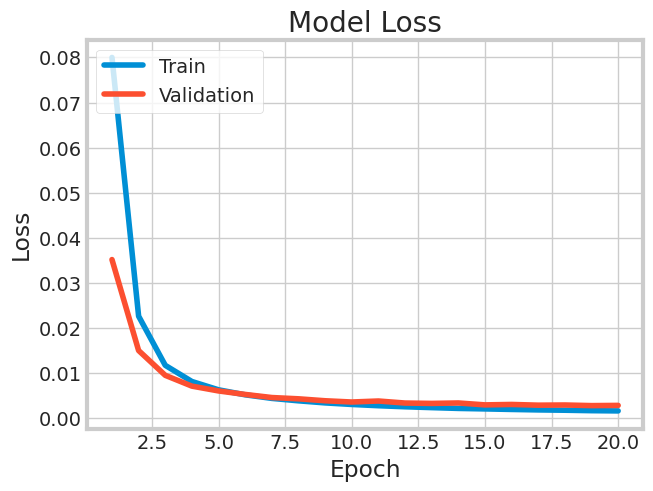

In [122]:
plotLearningCurve(oversample_history)